In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [37]:
df = pd.read_csv('epa-sea-level.csv', delimiter =',')
df_trabajo = df.copy()

In [38]:
df_trabajo

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [39]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

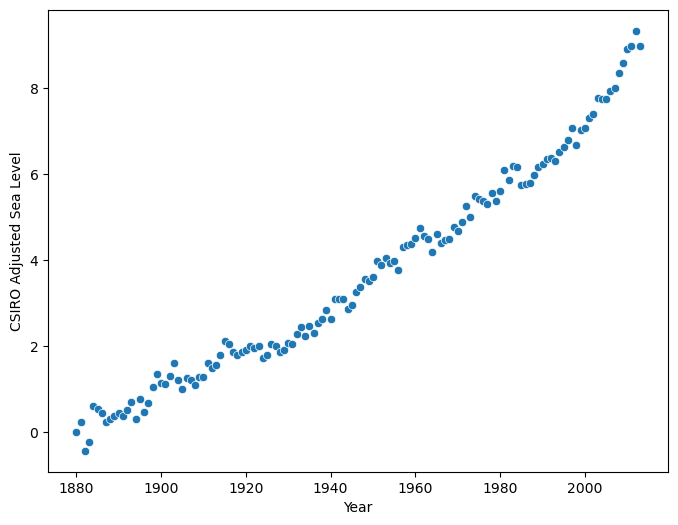

In [40]:
# Use matplotlib to create a scatter plot using the Year column as 
# the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo, x="Year", y="CSIRO Adjusted Sea Level")
#plt.xlim(1880,2014)

In [41]:
X = df_trabajo['Year']
Y = df_trabajo['CSIRO Adjusted Sea Level']

In [42]:
# Use the linregress function from scipy.stats to get the slope 
# and y-intercept of the line of best fit. Plot the line of best 
# fit over the top of the scatter plot. Make the line go through 
# the year 2050 to predict the sea level rise in 2050.
res = stats.linregress(X,Y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(f'intercepyo: {res.intercept}')
print(f'slope: {res.slope}')

R-squared: 0.969747
intercepyo: -119.06594196773978
slope: 0.0630445840121348


In [43]:
def linearregre(x):
    return  round(res.intercept + res.slope*x,6)

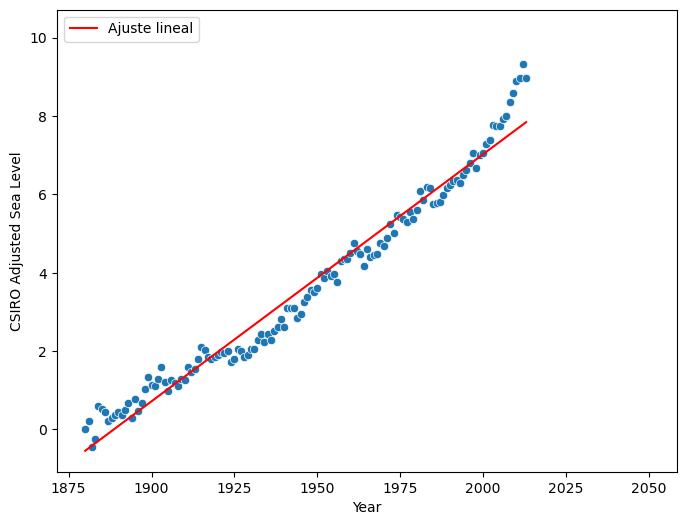

In [44]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo, x="Year", y="CSIRO Adjusted Sea Level")
plt.plot(X, res.intercept + res.slope*X, color = 'red', label = 'Ajuste lineal')
plt.plot(2050,linearregre(2050))
plt.legend()

In [45]:
linearregre(2050)

10.175455

In [46]:
X1 = np.arange(1881,2051)
X1

array([1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
       1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902,
       1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030, 20

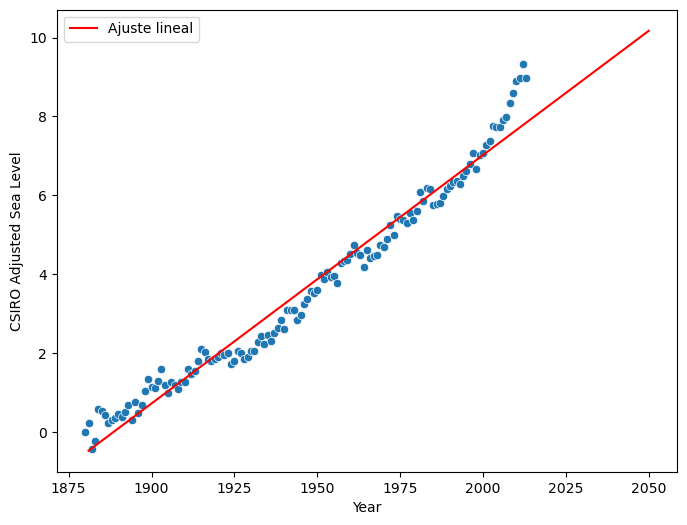

In [47]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo, x="Year", y="CSIRO Adjusted Sea Level")
plt.plot(X1, res.intercept + res.slope*X1, color = 'red', label = 'Ajuste lineal')
plt.legend()

Plot a new line of best fit just using the data from year 2000 
through the most recent year in the dataset. Make the line also 
go through the year 2050 t|bo predict the sea level rise in 2050 if 
the rate of rise continues as it has since the year 2000.

In [48]:
df_trabajo2 = df_trabajo[120:134]

In [49]:
X2 = df_trabajo['Year'][120:134]
Y2 = df_trabajo['CSIRO Adjusted Sea Level'][120:134]

In [50]:
res1 = stats.linregress(X2,Y2)
print(f"R-squared: {res1.rvalue**2:.6f}")
print(f'intercepyo: {res1.intercept}')
print(f'slope: {res1.slope}')

R-squared: 0.953137
intercepyo: -325.7934668059649
slope: 0.1664272733318682


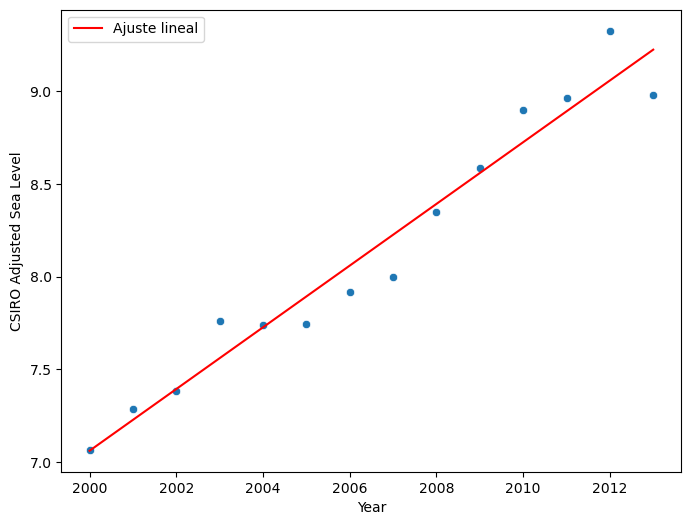

In [51]:
## 2000 - 2013
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo2, x="Year", y="CSIRO Adjusted Sea Level")
plt.plot(X2, res1.intercept + res1.slope*X2, color = 'red', label = 'Ajuste lineal')
plt.legend()

In [52]:
def newline(t):
    return round(res1.intercept + res1.slope*t,6)

In [53]:
newline(2050)

15.382444

In [54]:
X3 = np.arange(2000,2051)
X3

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050])

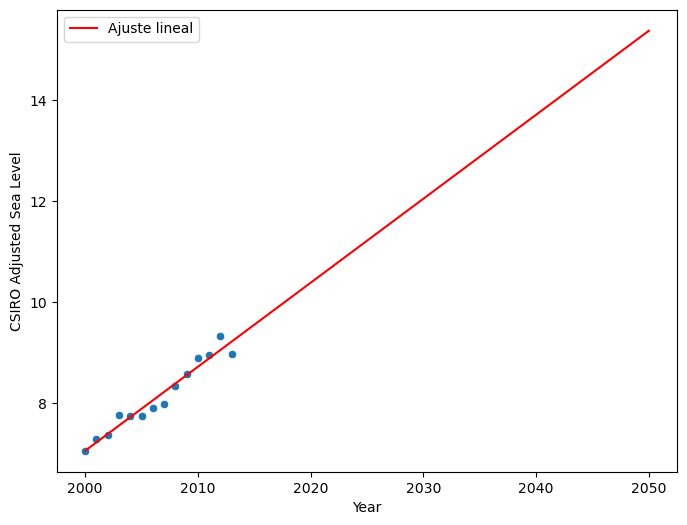

In [55]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo2, x="Year", y="CSIRO Adjusted Sea Level")
plt.plot(X3, res1.intercept + res1.slope*X3, color = 'red', label = 'Ajuste lineal')
plt.legend()

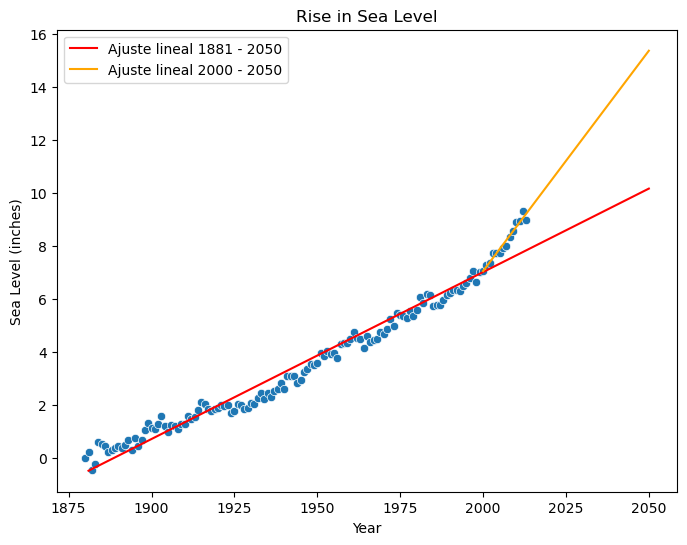

In [56]:
# uniendo todo
plt.figure(figsize= (8,6))
sns.scatterplot(data = df_trabajo, x="Year", y="CSIRO Adjusted Sea Level")
plt.plot(X1, res.intercept + res.slope*X1, color = 'red', label = 'Ajuste lineal 1881 - 2050')
plt.plot(X3, res1.intercept + res1.slope*X3, color = 'orange', label = 'Ajuste lineal 2000 - 2050')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()